In [10]:
import pandas as pd

In [13]:
train = pd.read_csv('../data/diamonds_train.csv')
to_predict = pd.read_csv('../data/diamonds_predict.csv')
sample_sub = pd.read_csv('../data/sample_submission.csv')

naive model

In [14]:
train['price'].mean()

3928.444469163268

In [15]:
submission = pd.DataFrame({'id': to_predict.id, 'price': train['price'].mean()})

In [16]:
submission.to_csv('naive_submission.csv', index=False)

simple model

In [17]:
train

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


In [18]:
target = 'price'
cat_features = ['cut', 'color', 'clarity']
num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

cat_df = pd.get_dummies(train[cat_features])
num_df = train[num_features]
X_all = pd.concat([num_df, cat_df], axis=1)

cat_df = pd.get_dummies(to_predict[cat_features])
num_df = to_predict[num_features]
X_predict_df = pd.concat([num_df, cat_df], axis=1)

y_all = train[target].values

In [19]:
X = train[num_features].values
X

array([[ 1.21, 62.4 , 58.  ,  6.83,  6.79,  4.25],
       [ 0.32, 63.  , 57.  ,  4.35,  4.38,  2.75],
       [ 0.71, 65.5 , 55.  ,  5.62,  5.53,  3.65],
       ...,
       [ 1.01, 62.7 , 56.  ,  6.37,  6.42,  4.01],
       [ 0.33, 61.9 , 54.3 ,  4.45,  4.47,  2.76],
       [ 1.24, 62.  , 58.  ,  6.83,  6.88,  4.25]])

In [20]:
X = train[num_features].values

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression

simple model

In [23]:
train.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


In [24]:
(train['x'] - train['x'].mean()) / train['x'].std()

0        0.978795
1       -1.226723
2       -0.097284
3       -0.933247
4        0.729785
           ...   
40450    1.218912
40451    2.294991
40452    0.569707
40453   -1.137791
40454    0.978795
Name: x, Length: 40455, dtype: float64

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(train[num_features].values)

StandardScaler()

In [29]:
x_scaled = scaler.transform(train[num_features])

NEW MODEL

In [30]:
# imports
import numpy as np
import pandas as pd

# dataviz
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [31]:
train = pd.read_csv('../data/diamonds_train.csv')
to_predict = pd.read_csv('../data/diamonds_predict.csv')
sample_sub = pd.read_csv('../data/sample_submission.csv')

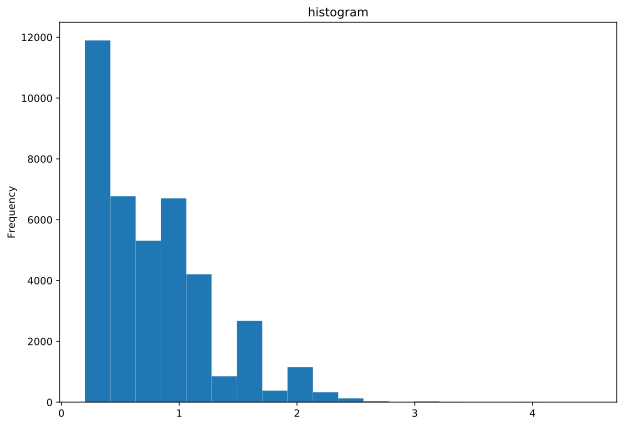

In [32]:
train['carat'].plot(kind='hist', bins=20, title='histogram', figsize=(10, 7));

In [36]:
target = 'price'
cat_features = ['cut', 'color', 'clarity']
num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

for cat_feat in cat_features:
    train[cat_feat] = train[cat_feat].astype('category')
    to_predict[cat_feat] = to_predict[cat_feat].astype('category')
    
cat_df = pd.get_dummies(train[cat_features])
num_df = train.loc[:,num_features]
train_df = pd.concat([cat_df, num_df], axis=1)

cat_df = pd.get_dummies(to_predict[cat_features])
num_df = to_predict.loc[:,num_features]
test_df = pd.concat([cat_df, num_df], axis=1)


features = list(cat_df.columns) + list(num_df.columns)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(train_df.loc[:,features].values)
y = train[target]

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=X, y=y)

LinearRegression()

In [40]:
X_test = scaler.transform(test_df.loc[:,features].values)
y_hat = model.predict(X_test).clip(0, 30000)
submission = pd.DataFrame({'id': to_predict['id'], 'price': y_hat})
submission.to_csv('submission.csv', index=False)